# Data storytelling


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_annual = pd.read_csv("data/co2_annmean_mlo.csv", skiprows=43)
df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [2]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    64 non-null     int64  
 1   mean    64 non-null     float64
 2   unc     64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


<Axes: title={'center': 'CO$_2$ emissions'}, xlabel='year', ylabel='ppm'>

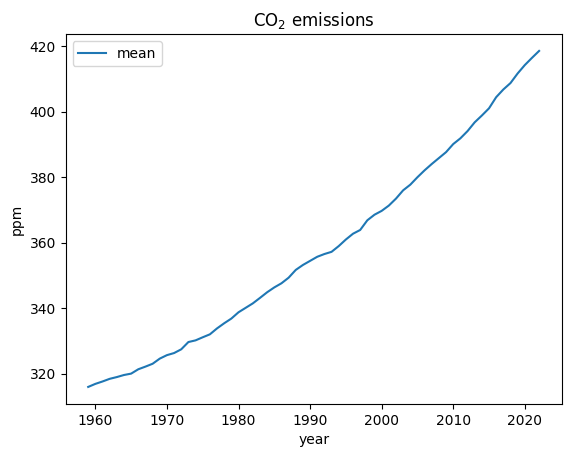

In [3]:
df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$ emissions")

In [4]:
df_country = pd.read_html(
    "https://www.worldometers.info/co2-emissions/co2-emissions-by-country/"
)
len(df_country)

1

In [5]:
df_country = pd.read_html(
    "https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0
)[0]
df_country

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,Share of world
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%
...,...,...,...,...,...,...
202,Saint Pierre & Miquelon,37110,-1.46%,5732,6.47,0.00%
203,Anguilla,22810,3.63%,14180,1.61,0.00%
204,Falkland Islands,21770,0.14%,3490,6.24,0.00%


In [6]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 1 to 206
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      206 non-null    object 
 1   CO2 Emissions  (tons, 2022)  206 non-null    int64  
 2   1 Year  Change               206 non-null    object 
 3   Population  (2022)           206 non-null    int64  
 4   Per  capita                  206 non-null    float64
 5   Share  of world              206 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.3+ KB


In [7]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis="columns")
df_country

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%
...,...,...,...,...,...,...
202,Saint Pierre & Miquelon,37110,-1.46%,5732,6.47,0.00%
203,Anguilla,22810,3.63%,14180,1.61,0.00%
204,Falkland Islands,21770,0.14%,3490,6.24,0.00%


In [8]:
df_country["World percentage"] = (
    df_country["World percentage"].str.rstrip("%").astype(float)
)
df_country

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88
2,United States,4853780240,1.78%,341534046,14.21,12.60
3,India,2693034100,6.52%,1425423212,1.89,6.99
4,Russia,1909039310,-1.22%,145579899,13.11,4.96
5,Japan,1082645430,0.65%,124997578,8.66,2.81
...,...,...,...,...,...,...
202,Saint Pierre & Miquelon,37110,-1.46%,5732,6.47,0.00
203,Anguilla,22810,3.63%,14180,1.61,0.00
204,Falkland Islands,21770,0.14%,3490,6.24,0.00


<Axes: xlabel='Country'>

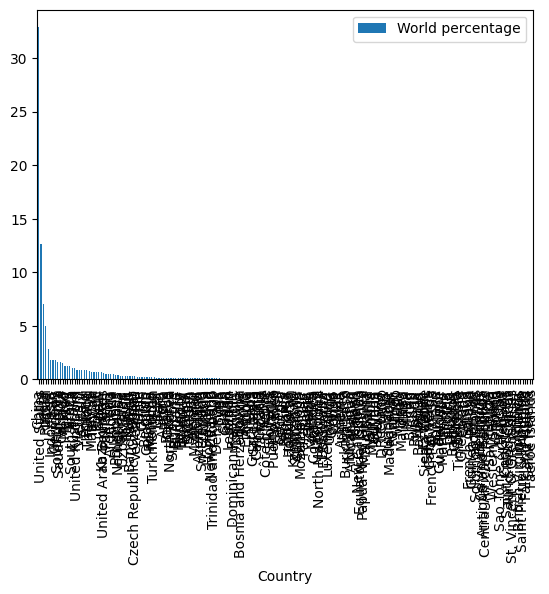

In [9]:
df_country.plot(kind="bar", x="Country", y="World percentage")

<Axes: xlabel='Country'>

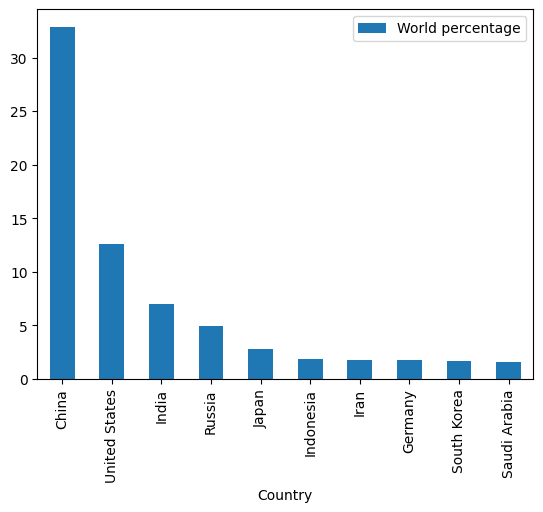

In [10]:
df_country.head(10).plot(kind="bar", x="Country", y="World percentage")

## Remove clutter


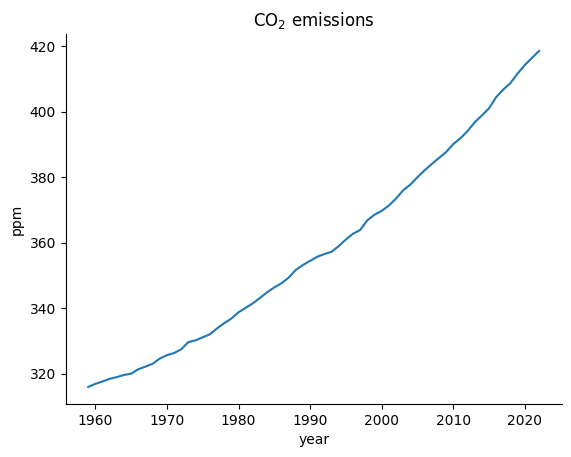

In [11]:
ax_annual = df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$ emissions")
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.legend().set_visible(False)

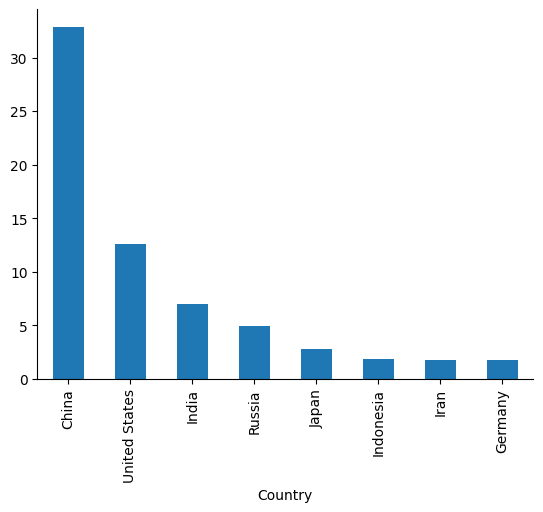

In [12]:
ax_percentage = df_country.head(8).plot(kind="bar", x="Country", y="World percentage")
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.legend().set_visible(False)

## Attention


Text(0.0, 1.0, 'The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959')

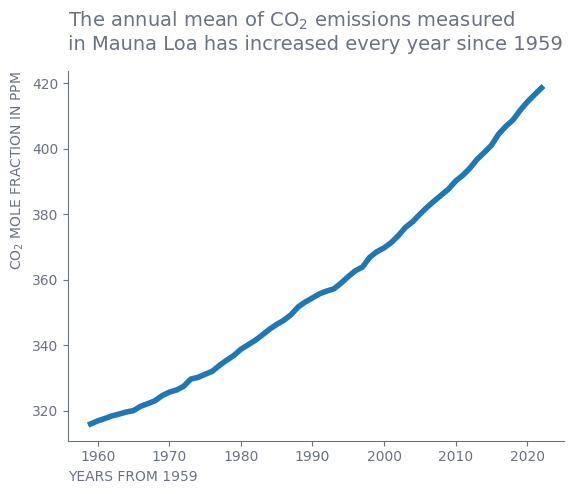

In [16]:
GRAY1 = "#6B7280"

ax_annual = df_annual.plot(x="year", y="mean", ylabel="ppm", linewidth=4)
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.spines["left"].set_color(GRAY1)
ax_annual.spines["bottom"].set_color(GRAY1)
ax_annual.legend().set_visible(False)

ax_annual.tick_params(axis="both", colors=GRAY1)

ax_annual.set_xlabel("YEARS FROM 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel("CO$_2$ MOLE FRACTION IN PPM", loc="top", color=GRAY1)

ax_annual.set_title(
    "The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959",
    loc="left",
    pad=15,
    color=GRAY1,
    fontsize=14,
)

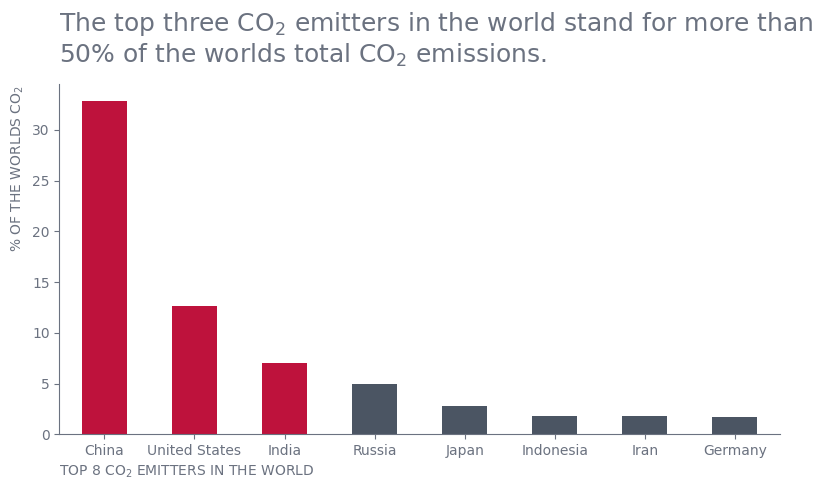

In [32]:
number_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"

colors = [red] * top_emitter + [gray] * (number_countries - top_emitter)

ax_percentage = df_country.head(8).plot(
    kind="bar", x="Country", y="World percentage", color=colors, rot=0
)
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.legend().set_visible(False)

ax_percentage.set_xlabel("TOP 8 CO$_2$ EMITTERS IN THE WORLD", loc="left", color=GRAY1)
ax_percentage.set_ylabel("% OF THE WORLDS CO$_2$ ", loc="top", color=GRAY1)

ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.spines["left"].set_color(GRAY1)
ax_percentage.spines["bottom"].set_color(GRAY1)

ax_percentage.tick_params(axis="both", colors=GRAY1)

ax_percentage.set_title(
    "The top three CO$_2$ emitters in the world stand for more than\n50% of the worlds total CO$_2$ emissions.",
    loc="left",
    pad=15,
    color=GRAY1,
    fontsize=18,
)


fig = ax_percentage.get_figure()
fig.set_size_inches(8,5)
fig.tight_layout()
fig.savefig("top_emitters.png", dpi=200)